<a href="https://colab.research.google.com/github/MarcinAn/Baza_filmow/blob/main/Baza_filmow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pobieranie danych**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
genres = pd.read_csv('tmdb_genres.csv')
movies = pd.read_csv('tmdb_movies.csv')

**Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.**

In [20]:
quant=movies['vote_count']
quant=quant.quantile(.75)
movies_top_10=movies[movies['vote_count']>quant.item()]
movies_top_10=movies_top_10[['original_title', 'vote_average']]
movies_top_10.sort_values(by='vote_average', ascending=False, inplace=True)
movies_top_10.head(10)

,original_title,vote_average
1881,The Shawshank Redemption,8.5
3337,The Godfather,8.4
2294,千と千尋の神隠し,8.3
3865,Whiplash,8.3
2731,The Godfather: Part II,8.3
3232,Pulp Fiction,8.3
1818,Schindler's List,8.3
662,Fight Club,8.3
2170,Psycho,8.2
1847,GoodFellas,8.2


**Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.**

Text(0.5, 1.0, 'Średni przychów i budżet filmu w latach 2010-2016 roku')

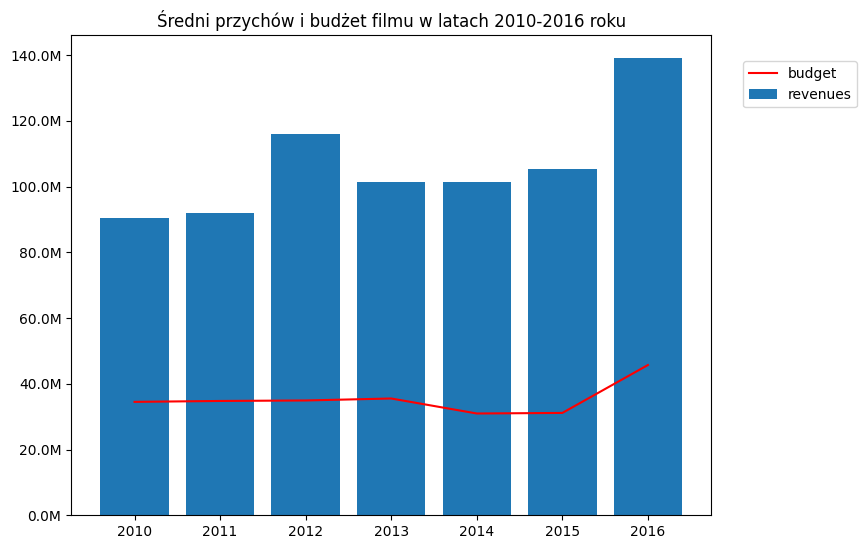

In [4]:
date_pivot = movies
date_pivot['release_date']=pd.to_datetime(date_pivot['release_date'])
date_pivot=date_pivot[(date_pivot['release_date'].dt.year >= 2010) & (date_pivot['release_date'].dt.year <= 2016)]
date_pivot=date_pivot.groupby(date_pivot['release_date'].dt.year).agg({'revenue':'mean','budget':'mean'})
date_pivot.reset_index(inplace=True)

def million(x, pos):
        return '{:2.1f}M'.format(x*1e-6)

fig, ax = plt.subplots()
ax = fig.add_axes([0,0,1,1]) # left, bottom, width, height
x = date_pivot['release_date']
y = date_pivot['revenue']
formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)
ax.bar(x,y, label='revenues')

x = date_pivot['release_date']
y = date_pivot['budget']
formatter = plt.FuncFormatter(million)
ax.yaxis.set_major_formatter(formatter)
ax.plot(x,y,color='red', label='budget')
ax.legend(loc=(1.05,0.85))
ax.set_title('Średni przychów i budżet filmu w latach 2010-2016 roku')


**Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.**

In [21]:
genres.rename(columns={genres.columns[0]:'genre_id'}, inplace=True)
movies_with_genres = pd.merge(movies,genres,how='left',on='genre_id')
movies_with_genres[['original_title', 'genres']]

,original_title,genres
0,Avatar,Action
1,Pirates of the Caribbean: At World's End,Adventure
2,Spectre,Action
3,The Dark Knight Rises,Action
4,John Carter,Action
...,...,...
4798,El Mariachi,Action
4799,Newlyweds,Comedy
4800,"Signed, Sealed, Delivered",Comedy
4801,Shanghai Calling,NaN


**Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?**

In [6]:
movies_with_genres_pivot=movies_with_genres.pivot_table(values='original_title', index='genres', aggfunc='count')
movies_with_genres_pivot.sort_values(by=['original_title'], ascending=False, inplace=True)
movies_with_genres_pivot.rename(columns={'original_title':'number'}, inplace=True)
movies_with_genres_pivot

,number
genres,
Drama,1207
Comedy,1042
Action,754
Adventure,339
Horror,300
Crime,195
Thriller,194
Animation,123
Fantasy,117


In [7]:
movies_with_genres_pivot.reset_index(inplace=True)

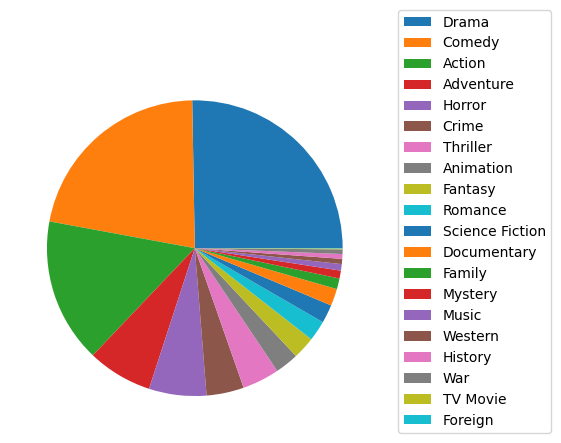

In [8]:
plt.pie(movies_with_genres_pivot['number'], labels=None)
plt.legend(loc=(1.05,0), labels=movies_with_genres_pivot['genres'])
plt.show()

**Filmy, którego gatunku trwają średnio najdłużej (runtime)?**

In [9]:
movies_time=movies_with_genres.pivot_table(values='runtime', index='genres', aggfunc='mean').round(2)
movies_time.sort_values(by=['runtime'], ascending=False, inplace=True)
movies_time

,runtime
genres,
History,133.96
War,126.12
Western,117.93
Drama,115.52
Adventure,113.06
Crime,112.14
TV Movie,110.50
Action,109.06
Science Fiction,109.03


**Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.**

In [10]:
history_movies=movies_with_genres[movies_with_genres['genres']=='History']

(array([2., 3., 5., 8., 4., 0., 0., 2., 0., 1.]),
 array([ 84. ,  98.1, 112.2, 126.3, 140.4, 154.5, 168.6, 182.7, 196.8,
        210.9, 225. ]),
 <BarContainer object of 10 artists>)

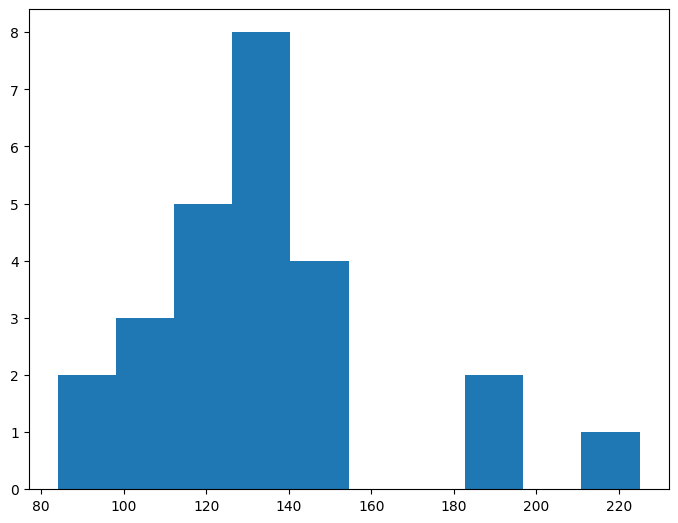

In [11]:
fig, ax = plt.subplots()
ax = fig.add_axes([0,0,1,1]) # left, bottom, width, height
x = history_movies['runtime']
ax.hist(x, bins=10)